# Neural Networks: Learning

### Cost Function for Neural Networks

- Notation:
    - L = Total no. of layers in the network
    - $s_l$ = no. of units (not counting bias unit) in layer $l$
- Two types of classification problems with neural networks:
    1. Binary Classification
        - $y=0$ or $y=1$
        - 1 output unit
    2. Multi-class classification (K classes)
        - $ y \in \mathbb{R}^K$
        - E.g. $\begin {bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$ = pedestrian,  $\begin {bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$ = car , $\begin {bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}$ = motorcycle, $\begin {bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$ = truck
        - K output units
        
- The cost function is going to be a generalized version of the logistic regression cost function: $J(\theta) = -\frac{1}{m}[\sum \limits_{i=1} ^{m} y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum \limits_{j=1}^n \theta_j^2$
    - Neural Network:
        - $h_\theta(x) \in \mathbb{R}^K$ $(h_\theta(x))_i = i^{th}$  output
        - $J(\theta) = -\frac{1}{m}[\sum \limits_{i=1} ^{m}\sum \limits_{k=1}^K y^{(i)}_k log(h_\theta(x^{(i)}))_k+(1-y^{(i)}_k)log(1-(h_\theta(x^{(i)}))_k)] + \frac{\lambda}{2m}\sum \limits_{l=1}^{L-1} \sum \limits_{i=l}^{s_l} \sum \limits_{j=1}^{s_l +1} (\theta_{ji}^{(l)})^2$
            - **Note:**
                - the double sum simply adds up the logistic regression costs calculated for each cell in the output layer
                - the triple sum simply adds up the squares of all the individual Θs in the entire network.
                - the i in the triple sum does not refer to training example i

### Backpropogation Algorithm

- Gradient Computation for one training example (x,y)
    - Forward Propagation:
        - $a^{(1)} = x$
        - $z^{(2)} = \theta^{(1)}a^{(1)}$
        - $a^{(2)} = g(z^{(2)}$ (add $a_0^{(2)}$)
        - $z^{(3)} = \theta^{(2)}a^{(2)}$
        - $a^{(3)} = g(z^{(3)}$ (add $a_0^{(3)}$)
        - $z^{(4)} = \theta^{(3)}a^{(3)}$
        - $a^{(4)} = h_\theta(x) = g(z^{(4)})$
    - Backpropgation algorithm:
        - Intuition: $\delta_j^{(l)} =$ "error" of node j in layer l.
        - For each output unit (layer L=4)
            - $\delta_j^{(4)}=a_j^{(4)}-y_j$
            - $\delta_j^{(3)}=(\theta^{(3)})^T\delta^{(4)}.*g'(z^{(3)})$
            - $\delta_j^{(2)}=(\theta^{(2)})^T\delta^{(3)}.*g'(z^{(2)})$
        - Training Set = {$(x^{(1)},y^{(1)}),...,(x^{(m)},y^{(m)})$}
            - set $\Delta_{ij}^{(l)} = 0$ (for all l,i,j)
                - this acts as an accumulator that slowly add things in order to compute the partial derivatives
            - For i = 1 to m:
                - set $a^{(1)} = x^{(i)}$
                - perform forward propagation to compute $a^{(l)}$ for $l=2,3,...,L$
                - using $y^{(i)}$, compute $\delta^{(L)}= a^{(L)}-y^{(i)}$
                - Compute $\delta^{(L-1)},\delta^{(L-2)},...,\delta^{(2)}$
                - $\Delta_{ij}^{(l)} := \Delta_{ij}^{(l)} + a_j^{(l)}\delta_i^{(l+1)}$
                    - Vectorized = $\Delta^{(l)} := \Delta^{(l)} + \delta_i^{(l+1)}(a^{(l)})^T$
            - $D_{ij}^{(l)} := \frac{1}{m}\Delta_{ij}^{(l)}+\lambda\theta_{ij}^{(l)}$ if $j\neq0$
            - $D_{ij}^{(l)} := \frac{1}{m}\Delta_{ij}^{(l)}$ if $j=0$
            
            - Check out the following resources for detailed walkthroughs for computing the derivatives:
                1. https://www.youtube.com/watch?v=tIeHLnjs5U8&ab_channel=3Blue1Brown
                2. https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60
                3. http://neuralnetworksanddeeplearning.com/chap2.html
            
    

### Backpropagation Intuition

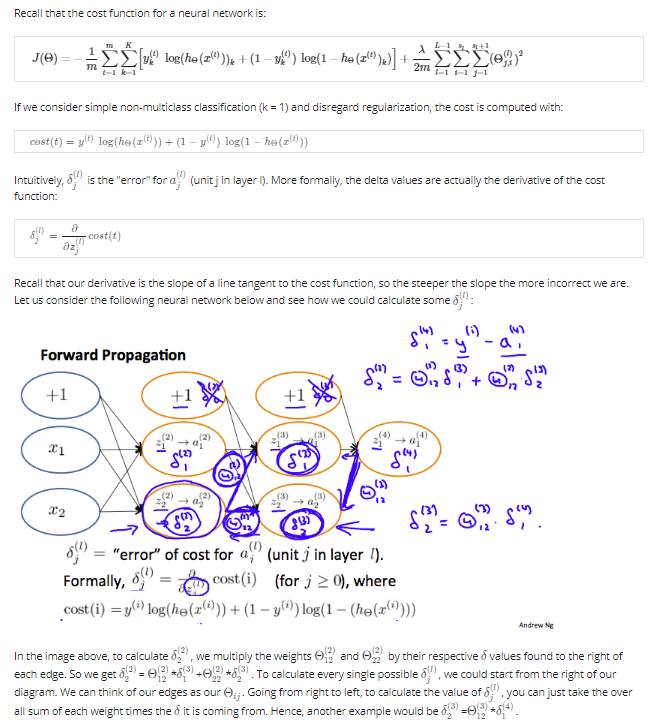

### Enroll Parameters

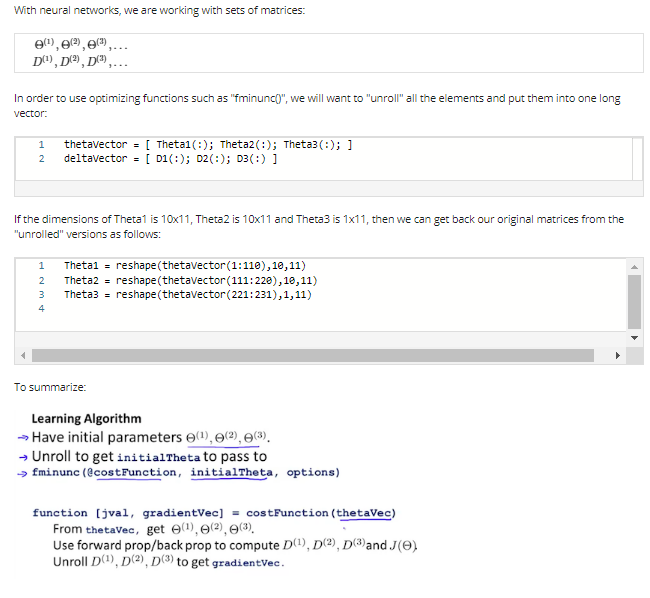

### Gradient Checking
- Used to make sure that forward/backpropagation is working correctly and with no bugs, which can sometimes be subtle and give a false measure of how well the algorithm is performing.
- Numerical Estimation of Gradients:
    - For a point, $J(\theta)$, calculate $J(\theta + \epsilon)$ and $J(\theta - \epsilon)$. The slope of the line connecting those two points, is the estimation of the slope of $J(\theta)$, which is approximately  = $\frac{J(\theta + \epsilon)-J(\theta - \epsilon)}{2\epsilon}$
    - Where generally $\epsilon = 10^{-4}$
    - This can be implemented in octave using **gradApprox = (J(theta+EPSILON)-J(theta-EPSILON))/(2*EPSILON)**
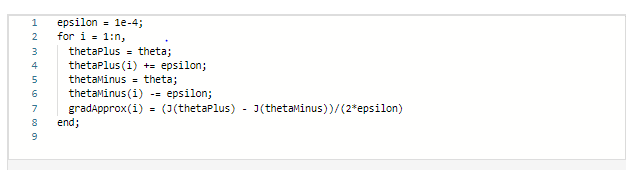

### Random Initialization

- Prior to running gradient descent, we must set the **initialTheta** values to something:
    - Setting initialTheta = zeros(n,1) does not work for neural networks because if all the weights are the same, then all of the $a^{(l)}$ and all of the $\delta^{(l)}$ values will be equivalent for each layer
    - To get around the above problem, Initialize each $\theta_{ij}^{(l)}$ to a random value in $[-\epsilon,\epsilon]$ (i.e. $-\epsilon \leq \theta_{ij}^{(l)} \leq \epsilon$
    
### Putting it all Together

- Process for Training a Neural Network:
    1. Randomly initialize weights
    2. Implement Forward propagation to get $h_\theta(x^{(i)})$ for any $x^{(i)}$
    3. Implement code to compute cost function $J(\theta)$
    4. Implement backpropagation to compute partial derivatives $\frac{\delta}{\delta\theta_{ij}^{(l)}}J(\theta)$
    5. Use gradient checking to compare $\frac{\delta}{\delta\theta_{ij}^{(l)}}J(\theta)$ computed using backpropagation vs. numerical estimate of gradient of $J(\theta)$. Then disable gradient checking.
    6. Use gradient descent or other optimization method with backprop to try to minimize $J(\theta)$ as a function of the parameters $\theta$
    
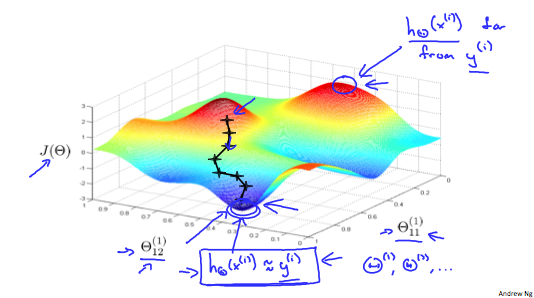